In [1]:
from Calc import open_model, save
from Parameters import *
from Geometry import *
from Calc import open_model, save
import matplotlib.pyplot as plt

#from Parameters import Params
from scipy.signal import find_peaks
from matplotlib.animation import FuncAnimation
from scipy.ndimage import zoom
from PIL import Image
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [ ]:
Omega =  np.linspace(omega_0*0.9, omega_0*1.2, 100)
Params['Omega'] = [Omega[0], Omega[-1], len(Omega)]
Params['Packing'] = 'Rectangle'
Params['Orientations'] = 'zyx'
Params['N'], Params['shape'] = to3D(12, 12, 12, 'zyx')
Params['Solver_type'] = 'Straight'
save('DATALowTol', Params)


Packing <function Rectangle_packing at 0x00000273FFE98FE0>
Количество колец: {'z': 1872, 'y': 1872, 'x': 1872}
Rectangle_NoGrad_12x12x12_zyx_Straight
C: [4.70000000e-08 4.66912549e-08 4.63825099e-08 ... 4.39125494e-08
 4.36038043e-08 4.32950593e-08]
Phi_0z:  [1. 1. 1. ... 0. 0. 0.]
Matrix forming


 38%|███▊      | 2141/5616 [11:18<22:46,  2.54it/s]  

[[ 0.02953535+5.15408143e-04j  0.02577179+3.89402102e-04j
   0.02417847+3.44799238e-04j ...  0.00098693+2.34251962e-05j
   0.00118382+2.56873923e-05j  0.00129805+2.60423230e-05j]
 [ 0.03059713+5.51105468e-04j  0.02658196+4.13133493e-04j
   0.02490468+3.64879781e-04j ...  0.00103992+2.52772435e-05j
   0.00124327+2.75854823e-05j  0.0013595 +2.78420436e-05j]
 [ 0.03172566+5.90088597e-04j  0.02743639+4.39013519e-04j
   0.02566851+3.86609069e-04j ...  0.00109674+2.73154371e-05j
   0.0013067 +2.96610577e-05j  0.00142478+2.97971898e-05j]
 ...
 [-0.0260625 +3.14898079e-04j -0.02828822+3.61683646e-04j
  -0.02971426+4.01642984e-04j ...  0.00220582+1.34661840e-04j
   0.00482519+3.84490600e-05j  0.00794803-4.10215174e-04j]
 [-0.02571027+3.04825409e-04j -0.02787345+3.50007718e-04j
  -0.0292532 +3.87783507e-04j ...  0.00220637-2.98121409e-07j
   0.00461853+1.16366974e-04j  0.00742033-1.96524090e-04j]
 [-0.02537099+2.94280945e-04j -0.02747461+3.41340357e-04j
  -0.02880893+3.72388044e-04j ...  0.00217

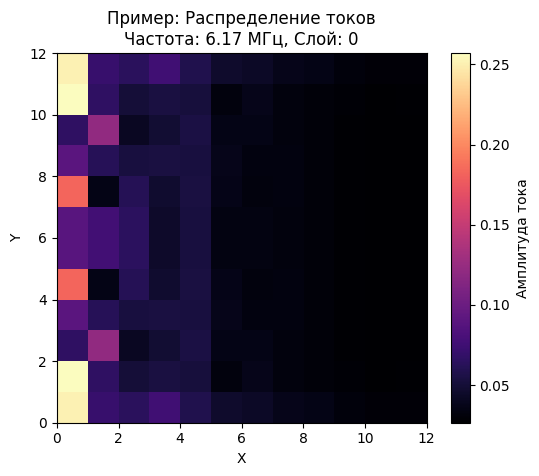

Text(0.5, 1.0, 'Imaginary part of polarisation')

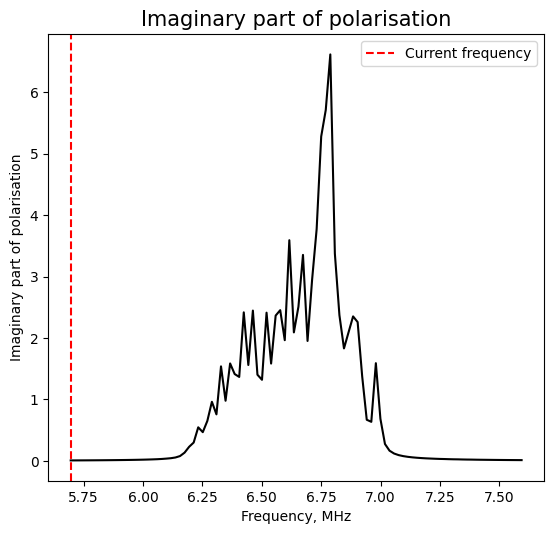

In [10]:
def plot_interpolated_current_distribution(currents, freq_index, layer_index, frequencies, title_prefix=""):

    current_at_freq = currents[freq_index]
    print('current_at_freq', current_at_freq)
    
    layer_currents_flat = current_at_freq[layer_index * 144 : (layer_index + 1) * 144]
    layer_currents_matrix = layer_currents_flat.reshape((12, 12))
    
    current_magnitude = np.abs(layer_currents_matrix)
    
    print('layer_current_matrix', layer_currents_matrix)
    print('current_magnitude', current_magnitude)
    
    interpolated_currents = zoom(current_magnitude, zoom=100, order=3)
    
    plt.imshow(current_magnitude, cmap='magma', extent=[0, 12, 0, 12])
    plt.colorbar(label="Амплитуда тока")
    plt.title(f"{title_prefix}Распределение токов\nЧастота: {frequencies[freq_index]:.2f} МГц, Слой: {layer_index}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


data = open_model('DATALowTol', Params, Currents=True)
currents = data['Currents']
frequencies = data['Omega'] / (2 * np.pi * 1e6)
ImagPolarisation = data['Polarization'][:, 0].imag

print(currents)

print(len(frequencies))

layer_index = 0
freq_index = 25

plot_interpolated_current_distribution(currents, freq_index, layer_index, frequencies, title_prefix="Пример: ")

fig_pol, ax_pol = plt.subplots(figsize = (6.4, 5.8))
plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, color = 'black')
mark = ax_pol.axvline(Omega[0]/2/np.pi/1e6, color = 'red', linestyle = '--', label = 'Current frequency')
plt.xlabel('Frequency, MHz')
plt.ylabel('Imaginary part of polarisation')
plt.legend()
plt.title('Imaginary part of polarisation', fontsize = 15)
#plt.savefig('imag_pol_cube_10x10x10_grad')


MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.
 98%|█████████▊| 98/100 [07:16<00:08,  4.45s/it]


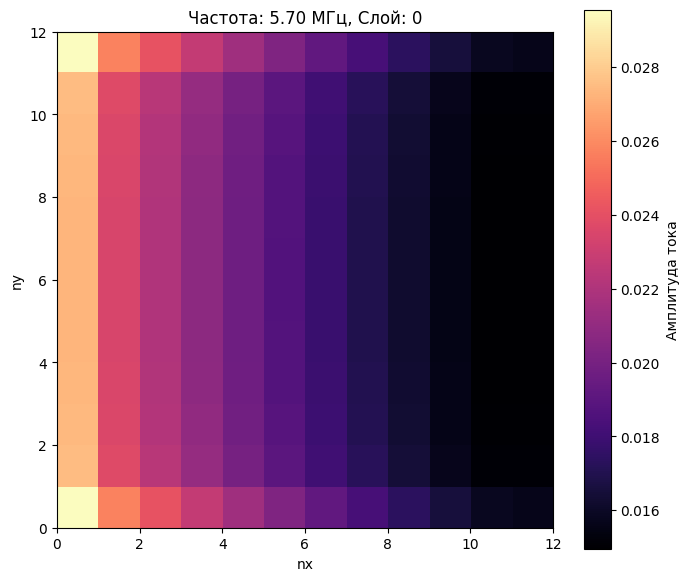

In [11]:
import matplotlib.animation as anime
from tqdm import tqdm

def gif_current_distribution(currents, freq_index, layer_index, frequencies, ax, title_prefix=""):
    current_at_freq = currents[freq_index]
    layer_currents_flat = current_at_freq[layer_index * 144 : (layer_index + 1) * 144]
    layer_currents_matrix = layer_currents_flat.reshape((12, 12))
    current_magnitude = np.abs(layer_currents_matrix)
    #interpolated_currents = zoom(current_magnitude, zoom=100, order=3)

    ax.clear()
    cax = ax.imshow(current_magnitude, cmap='magma', interpolation='nearest', extent=[0, 12, 0, 12])
    ax.set_title(f"{title_prefix}Частота: {frequencies[freq_index]:.2f} МГц, Слой: {layer_index}")
    ax.set_xlabel("nx")
    ax.set_ylabel("ny")
    return cax

data = open_model('DATALowTol', Params, Currents=True)
currents = data['Currents']
frequencies = data['Omega'] / (2 * np.pi * 1e6)
ImagPolarisation = data['Polarization'][:, 0].imag

layer_index = 0
freq_indices = range(0, len(frequencies), 1)

fig, ax = plt.subplots()

cax = gif_current_distribution(currents, freq_indices[0], layer_index, frequencies, ax, title_prefix="Анимация: ")
fig.colorbar(cax, ax=ax, label="Амплитуда тока")

def update(freq_index):
    ax.clear()
    cax = gif_current_distribution(currents, freq_index, layer_index, frequencies, ax)
    return cax,

fig.set_size_inches((8, 7))

ani = FuncAnimation(fig, update, frames=freq_indices, blit=False)

#HTML(ani.to_jshtml())

def plot_pol(i):
        mark.set_xdata([Omega[i]/2/np.pi/10**6])

anim = anime.FuncAnimation(fig_pol, plot_pol, frames = tqdm(list(range(len(Omega)))[::]), interval = 50)

anim.save(f'Plots\Images\{"ImagPolarisation_Cube_12x12x12_Grad_Straight"}.gif', writer='Pillow', fps=20)

ani.save(f'Plots\Images\{"Current_distribution_Cube_12x12x12_Grad_Straight"}.gif', writer='Pillow', fps=20)

#ani.save(f"Plots\Images\{'Current_distribution'}-{Params['Packing']}-{'12x12x12'}-{'Grad'}-{Params['Orientations']}rings-{Params['Solver_type']}", fps=20)

In [14]:
import os
import imageio
import moviepy
from moviepy import *
#from moviepy import VideoFileClip 
#from moviepy import VideoFileClip, clips_array

def convert_gif_to_mp4(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".gif"):
            gif_path = os.path.join(directory, filename)
            mp4_path = os.path.join(directory, filename.replace(".gif", ".mp4"))
            if os.path.exists(mp4_path):
                continue
            clip = VideoFileClip(gif_path)
            clip.write_videofile(mp4_path, codec="libx264")
            clip.close()

def combine_videos(video1_path, video2_path, orientation='horizontal', output_path=f"Plots\Images\{'Cube_12x12x12_Grad_Straight'}.mp4"):
    clip1 = VideoFileClip(video1_path)
    #clip2 = VideoFileClip(video2_path).resize(height=clip1.h if orientation == 'horizontal' else None,
                                             #width=clip1.w if orientation == 'vertical' else None).set_duration(clip1.duration)
    clip2 = VideoFileClip(video2_path)
    
    if orientation == 'horizontal':
        combined = clips_array([ [clip1, clip2] ])
    elif orientation == 'vertical':
        combined = clips_array([ [clip1], [clip2] ])
    else:
        raise ValueError("Orientation must be 'horizontal' or 'vertical'")
    
    combined.write_videofile(output_path, codec='libx264')
    clip1.close()
    clip2.close()
    combined.close()

# Example usage
if __name__ == "__main__":
    orientation = 'horizontal'
    directory = "Plots/Images"
    convert_gif_to_mp4(directory)
    name1 = directory


In [15]:
video1_path = f"Plots\Images\{'Current_distribution_Cube_12x12x12_Grad_Straight'}.mp4"
video2_path = f"Plots\Images\{'ImagPolarisation_Cube_12x12x12_Grad_Straight'}.mp4"

#video1_path = 'Current_distribution_Cube_12x12x12_Grad_Straight.mp4'
#video2_path = 'ImagPolarisation_Cube_12x12x12_Grad_Straight.mp4'

combine_videos(video1_path, video2_path)

MoviePy - Building video Plots\Images\Cube_12x12x12_Grad_Straight.mp4.
MoviePy - Writing video Plots\Images\Cube_12x12x12_Grad_Straight.mp4



MoviePy - Done !
MoviePy - video ready Plots\Images\Cube_12x12x12_Grad_Straight.mp4


In [18]:
packing = Packings[Params['Packing']]
rings_4d = packing(Params, Fill=True)
rings = sum([rings_4d[orientation] for orientation in rings_4d], [])

L, C, R = [], [], []
for ring in rings:
    L.append(ring.L)
    C.append(ring.C)
    R.append(ring.R)
L, C, R = np.array(L), np.array(C), np.array(R)
print('C:', C)
print(list(C))

C: [4.70000000e-08 4.63825099e-08 4.57650198e-08 ... 4.08250988e-08
 4.02076087e-08 3.95901186e-08]
[4.7000000000000004e-08, 4.638250987935126e-08, 4.5765019758702514e-08, 4.514752963805377e-08, 4.453003951740503e-08, 4.391254939675629e-08, 4.329505927610754e-08, 4.26775691554588e-08, 4.206007903481006e-08, 4.144258891416132e-08, 4.082509879351257e-08, 4.020760867286383e-08, 4.7000000000000004e-08, 4.638250987935126e-08, 4.5765019758702514e-08, 4.514752963805377e-08, 4.453003951740503e-08, 4.391254939675629e-08, 4.329505927610754e-08, 4.26775691554588e-08, 4.206007903481006e-08, 4.144258891416132e-08, 4.082509879351257e-08, 4.020760867286383e-08, 4.7000000000000004e-08, 4.638250987935126e-08, 4.5765019758702514e-08, 4.514752963805377e-08, 4.453003951740503e-08, 4.391254939675629e-08, 4.329505927610754e-08, 4.26775691554588e-08, 4.206007903481006e-08, 4.144258891416132e-08, 4.082509879351257e-08, 4.020760867286383e-08, 4.7000000000000004e-08, 4.638250987935126e-08, 4.5765019758702514e-0